In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('D:/Projects/Parkinsons_disease/image_model/data/parkinsons_disease_data.csv')

In [3]:
df.head()

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,...,FunctionalAssessment,Tremor,Rigidity,Bradykinesia,PosturalInstability,SpeechProblems,SleepDisorders,Constipation,Diagnosis,DoctorInCharge
0,3058,85,0,3,1,19.619878,0,5.108241,1.380660,3.893969,...,1.572427,1,0,0,0,0,0,0,0,DrXXXConfid
1,3059,75,0,0,2,16.247339,1,6.027648,8.409804,8.513428,...,4.787551,0,1,0,1,0,1,0,1,DrXXXConfid
2,3060,70,1,0,0,15.368239,0,2.242135,0.213275,6.498805,...,2.130686,1,0,0,0,1,0,1,1,DrXXXConfid
3,3061,52,0,0,0,15.454557,0,5.997788,1.375045,6.715033,...,3.391288,1,1,1,0,0,0,1,1,DrXXXConfid
4,3062,87,0,0,1,18.616042,0,9.775243,1.188607,4.657572,...,3.200969,0,0,0,1,0,1,0,0,DrXXXConfid


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2105 entries, 0 to 2104
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   PatientID                 2105 non-null   int64  
 1   Age                       2105 non-null   int64  
 2   Gender                    2105 non-null   int64  
 3   Ethnicity                 2105 non-null   int64  
 4   EducationLevel            2105 non-null   int64  
 5   BMI                       2105 non-null   float64
 6   Smoking                   2105 non-null   int64  
 7   AlcoholConsumption        2105 non-null   float64
 8   PhysicalActivity          2105 non-null   float64
 9   DietQuality               2105 non-null   float64
 10  SleepQuality              2105 non-null   float64
 11  FamilyHistoryParkinsons   2105 non-null   int64  
 12  TraumaticBrainInjury      2105 non-null   int64  
 13  Hypertension              2105 non-null   int64  
 14  Diabetes

In [5]:
df=df.drop('PatientID',axis=1)

In [6]:
df = df.drop('DoctorInCharge',axis=1)

In [7]:
plt.figure(figsize=(24,24))
sns.heatmap(df.corr(),annot=True,fmt=".1f")
plt.savefig('correlation_heatmap.png', dpi=1000, bbox_inches='tight')
plt.close()  # Close the plot to free up memory

<Axes: xlabel='Bradykinesia', ylabel='Tremor'>

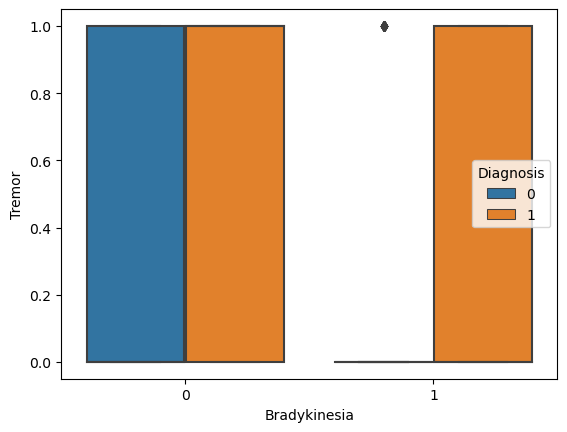

In [8]:
sns.boxplot(data=df,x='Bradykinesia',y='Tremor',hue='Diagnosis')

In [9]:
X = df.drop('Diagnosis',axis=1)

In [10]:
X.head()

,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,...,UPDRS,MoCA,FunctionalAssessment,Tremor,Rigidity,Bradykinesia,PosturalInstability,SpeechProblems,SleepDisorders,Constipation
0,85,0,3,1,19.619878,0,5.108241,1.380660,3.893969,9.283194,...,6.458713,29.181289,1.572427,1,0,0,0,0,0,0
1,75,0,0,2,16.247339,1,6.027648,8.409804,8.513428,5.602470,...,37.306703,12.332639,4.787551,0,1,0,1,0,1,0
2,70,1,0,0,15.368239,0,2.242135,0.213275,6.498805,9.929824,...,67.838170,29.927783,2.130686,1,0,0,0,1,0,1
3,52,0,0,0,15.454557,0,5.997788,1.375045,6.715033,4.196189,...,52.964696,21.304268,3.391288,1,1,1,0,0,0,1
4,87,0,0,1,18.616042,0,9.775243,1.188607,4.657572,9.363925,...,21.804880,8.336364,3.200969,0,0,0,1,0,1,0


In [11]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2105 entries, 0 to 2104
Data columns (total 32 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       2105 non-null   int64  
 1   Gender                    2105 non-null   int64  
 2   Ethnicity                 2105 non-null   int64  
 3   EducationLevel            2105 non-null   int64  
 4   BMI                       2105 non-null   float64
 5   Smoking                   2105 non-null   int64  
 6   AlcoholConsumption        2105 non-null   float64
 7   PhysicalActivity          2105 non-null   float64
 8   DietQuality               2105 non-null   float64
 9   SleepQuality              2105 non-null   float64
 10  FamilyHistoryParkinsons   2105 non-null   int64  
 11  TraumaticBrainInjury      2105 non-null   int64  
 12  Hypertension              2105 non-null   int64  
 13  Diabetes                  2105 non-null   int64  
 14  Depressi

In [12]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import numpy as np

# Assuming X is your feature matrix
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Initialize PCA
pca = PCA()

# Fit PCA to your data
pca.fit(X_scaled)

# Transform your data
X_pca = pca.transform(X_scaled)

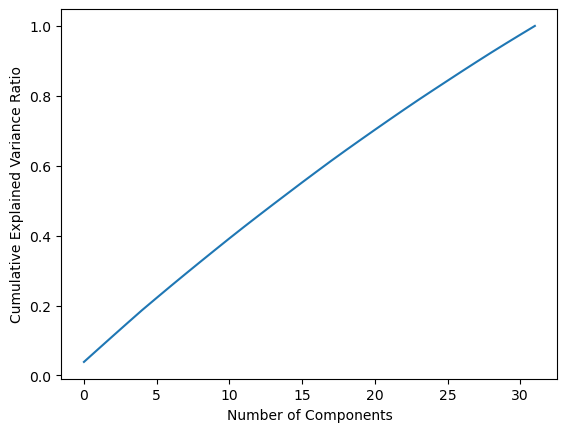

In [13]:
cumulative_variance_ratio = np.cumsum(pca.explained_variance_ratio_)

# Plot the cumulative explained variance
import matplotlib.pyplot as plt

plt.plot(cumulative_variance_ratio)
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.show()

In [14]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state=42,perplexity=30, learning_rate=200, n_iter=1000,)

# Fit and transform the data
X_tsne = tsne.fit_transform(X)

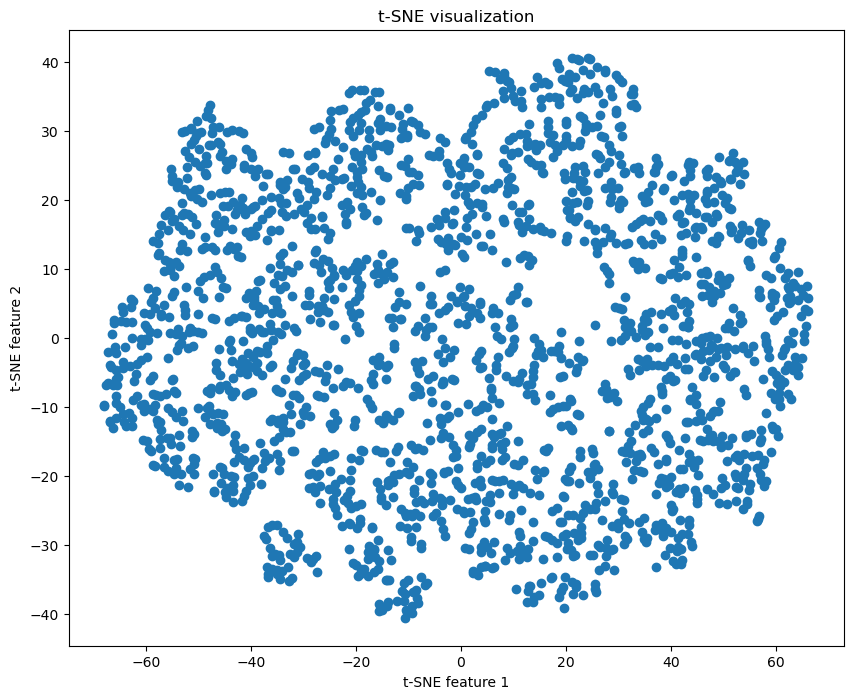

In [15]:
plt.figure(figsize=(10, 8))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1])
plt.title('t-SNE visualization')
plt.xlabel('t-SNE feature 1')
plt.ylabel('t-SNE feature 2')
plt.show()

In [16]:
y = df['Diagnosis']

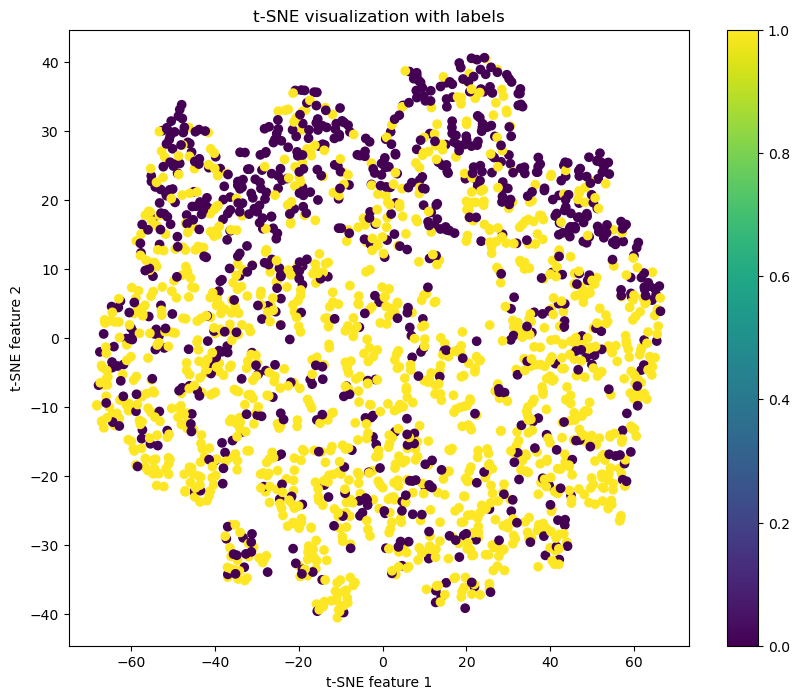

In [17]:
plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap='viridis')
plt.colorbar(scatter)
plt.title('t-SNE visualization with labels')
plt.xlabel('t-SNE feature 1')
plt.ylabel('t-SNE feature 2')
plt.show()

In [18]:
df.columns

Index(['Age', 'Gender', 'Ethnicity', 'EducationLevel', 'BMI', 'Smoking',
       'AlcoholConsumption', 'PhysicalActivity', 'DietQuality', 'SleepQuality',
       'FamilyHistoryParkinsons', 'TraumaticBrainInjury', 'Hypertension',
       'Diabetes', 'Depression', 'Stroke', 'SystolicBP', 'DiastolicBP',
       'CholesterolTotal', 'CholesterolLDL', 'CholesterolHDL',
       'CholesterolTriglycerides', 'UPDRS', 'MoCA', 'FunctionalAssessment',
       'Tremor', 'Rigidity', 'Bradykinesia', 'PosturalInstability',
       'SpeechProblems', 'SleepDisorders', 'Constipation', 'Diagnosis'],
      dtype='object')

In [19]:
dff = df
# dff = df.drop(['SystolicBP', 'CholesterolLDL', 'CholesterolHDL',
#        'CholesterolTriglycerides','DiastolicBP', 'Gender', 'Ethnicity', 'EducationLevel', 'BMI', 'Smoking',
#        'AlcoholConsumption', 'PhysicalActivity', 'DietQuality', 'SleepQuality',
#         'TraumaticBrainInjury', 'Hypertension',
#        'Diabetes', 'Stroke','AlcoholConsumption','Constipation',
#        'CholesterolTriglycerides',],axis=1)

In [20]:
dff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2105 entries, 0 to 2104
Data columns (total 33 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       2105 non-null   int64  
 1   Gender                    2105 non-null   int64  
 2   Ethnicity                 2105 non-null   int64  
 3   EducationLevel            2105 non-null   int64  
 4   BMI                       2105 non-null   float64
 5   Smoking                   2105 non-null   int64  
 6   AlcoholConsumption        2105 non-null   float64
 7   PhysicalActivity          2105 non-null   float64
 8   DietQuality               2105 non-null   float64
 9   SleepQuality              2105 non-null   float64
 10  FamilyHistoryParkinsons   2105 non-null   int64  
 11  TraumaticBrainInjury      2105 non-null   int64  
 12  Hypertension              2105 non-null   int64  
 13  Diabetes                  2105 non-null   int64  
 14  Depressi

<Axes: >

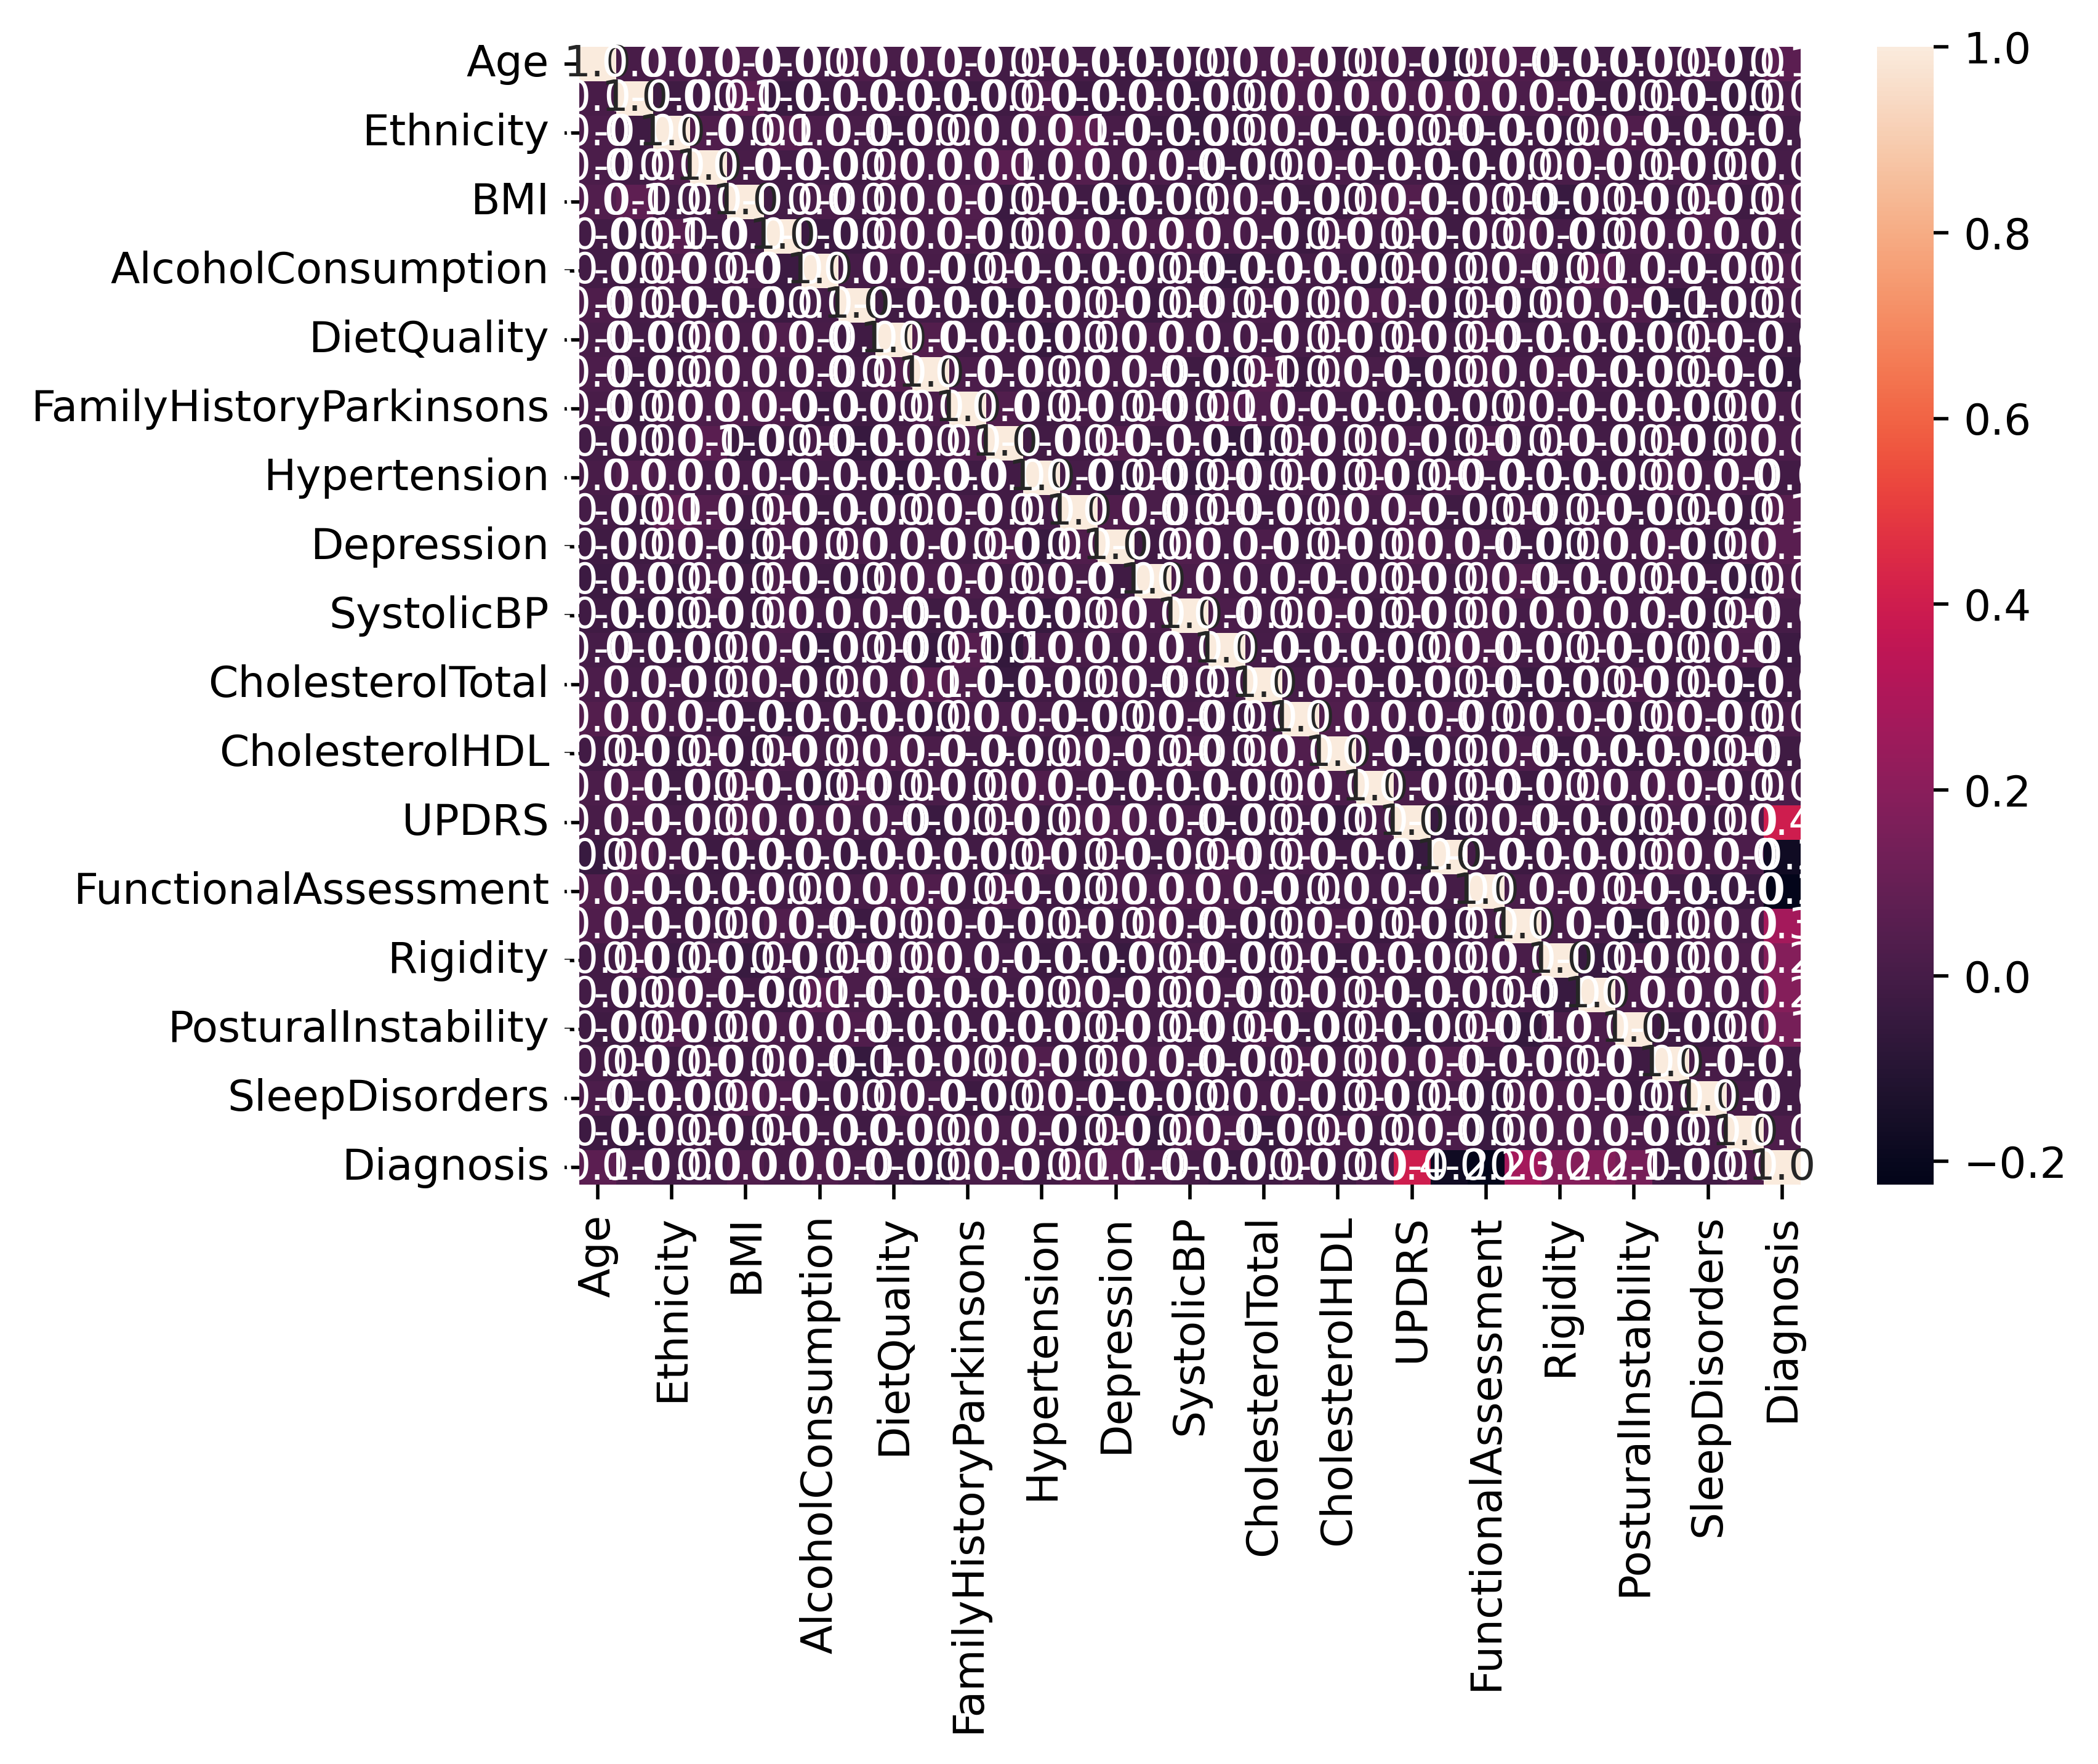

In [21]:
plt.figure(dpi=500)
sns.heatmap(dff.corr(),annot=True,fmt=".01f")

In [22]:
XX = dff.drop('Diagnosis',axis=1)

In [23]:
# Assuming X is your feature matrix
scaler = StandardScaler()
XX_scaled = scaler.fit_transform(XX)

# Initialize PCA
pca = PCA()

# Fit PCA to your data
pca.fit(XX_scaled)

# Transform your data
XX_pca = pca.transform(XX_scaled)

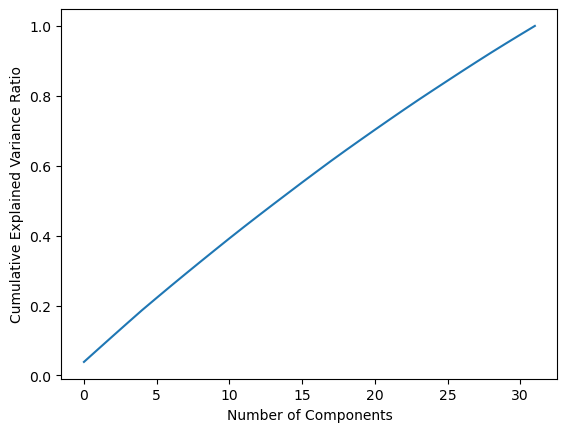

In [24]:
cumulative_variance_ratio = np.cumsum(pca.explained_variance_ratio_)
plt.plot(cumulative_variance_ratio)
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.show()

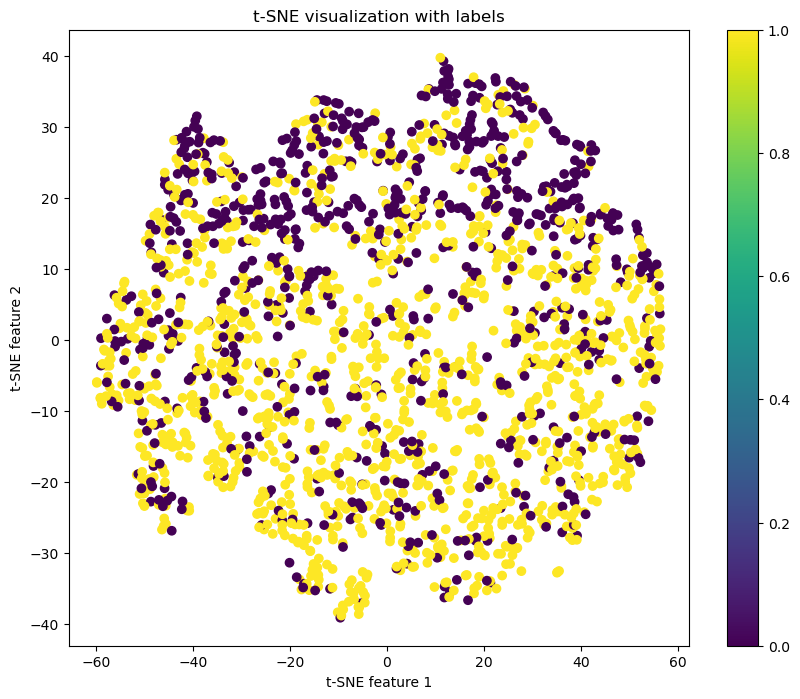

In [25]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state=42)

# Fit and transform the data
X_tsne = tsne.fit_transform(XX)
plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap='viridis')
plt.colorbar(scatter)
plt.title('t-SNE visualization with labels')
plt.xlabel('t-SNE feature 1')
plt.ylabel('t-SNE feature 2')
plt.show()

In [26]:
np.unique(y,return_counts=True)

(array([0, 1], dtype=int64), array([ 801, 1304], dtype=int64))

<Axes: >

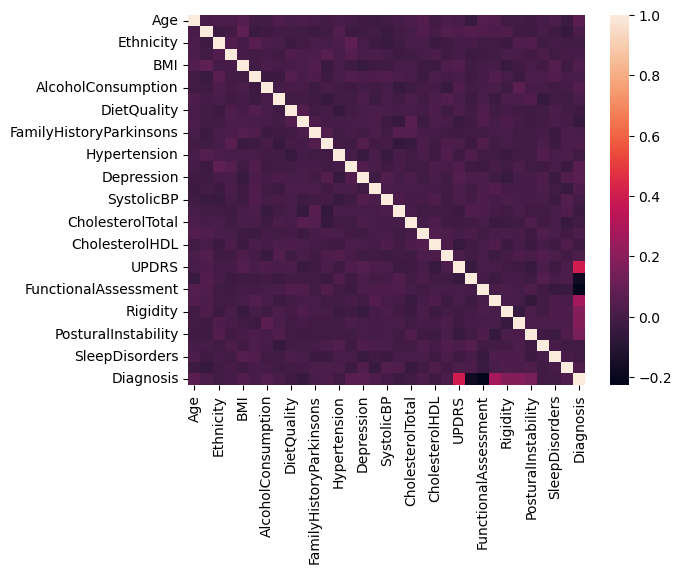

In [27]:
sns.heatmap(df.corr())

<Axes: xlabel='Diagnosis', ylabel='count'>

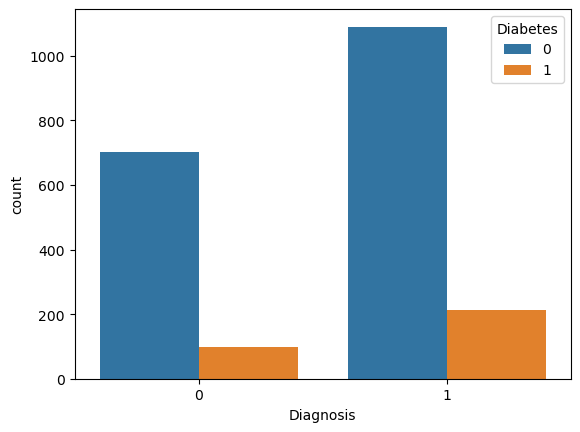

In [28]:
sns.countplot(data=df,x='Diagnosis',hue='Diabetes')

<Axes: xlabel='Diagnosis', ylabel='count'>

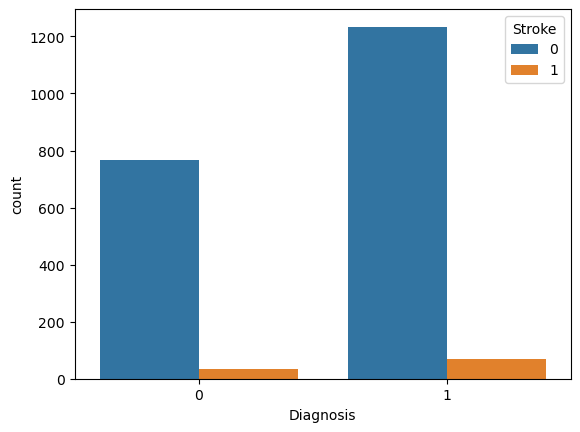

In [29]:
sns.countplot(data=df,x='Diagnosis',hue='Stroke')

<Axes: xlabel='Diagnosis', ylabel='UPDRS'>

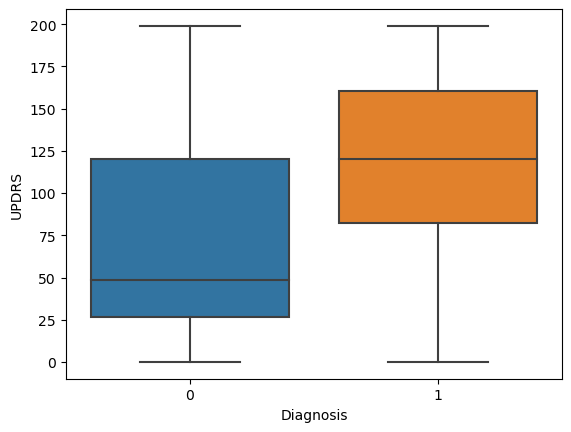

In [30]:
sns.boxplot(data=df,x='Diagnosis',y='UPDRS')

<Axes: xlabel='Diagnosis', ylabel='MoCA'>

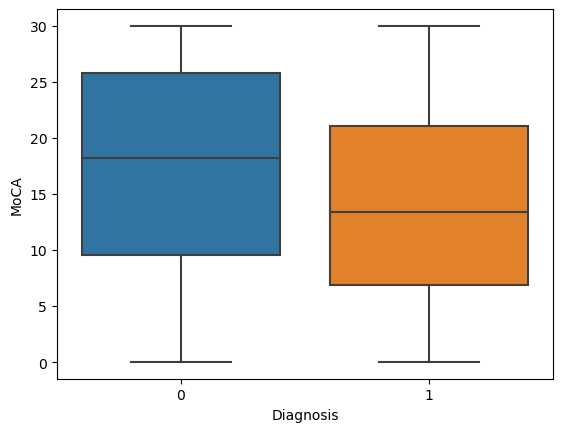

In [31]:
sns.boxplot(data=df,x='Diagnosis',y='MoCA')

<Axes: xlabel='Diagnosis', ylabel='FunctionalAssessment'>

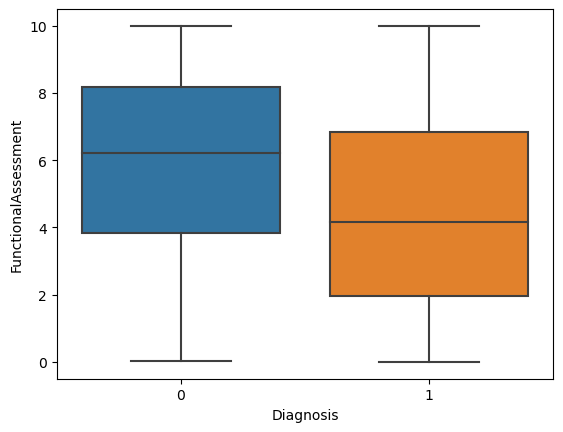

In [32]:
sns.boxplot(data=df,x='Diagnosis',y='FunctionalAssessment')

<Axes: xlabel='Diagnosis', ylabel='count'>

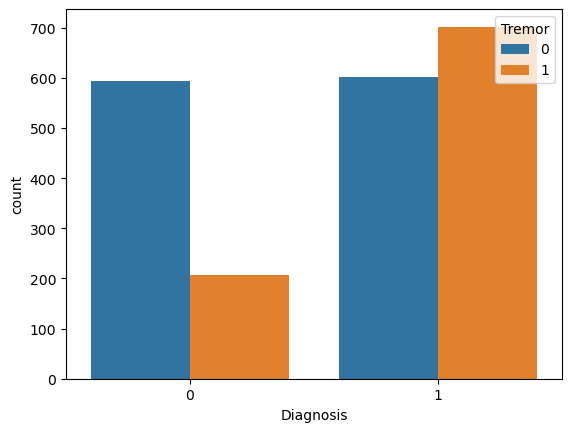

In [33]:
sns.countplot(data=df,x='Diagnosis',hue='Tremor')

<Axes: xlabel='Diagnosis', ylabel='count'>

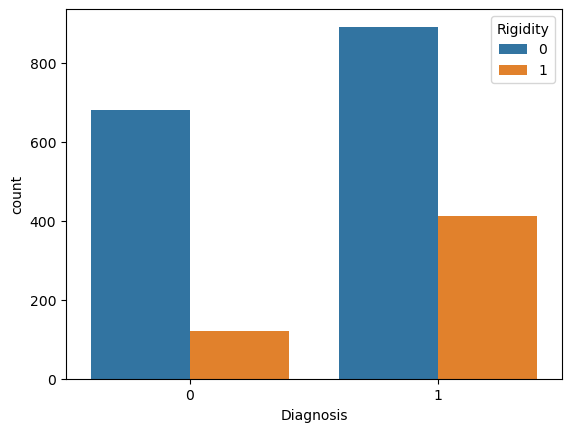

In [34]:
sns.countplot(data=df,x='Diagnosis',hue='Rigidity')

<Axes: xlabel='Diagnosis', ylabel='count'>

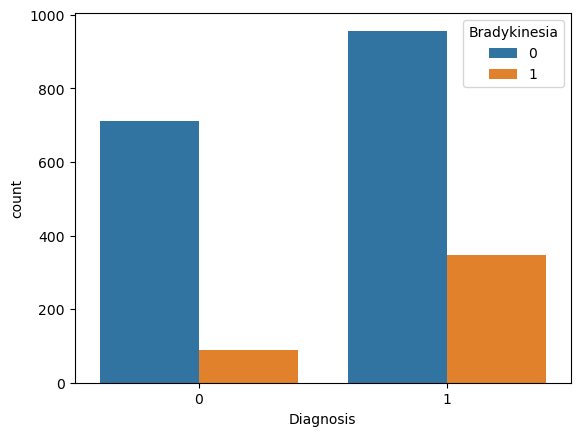

In [35]:
sns.countplot(data=df,x='Diagnosis',hue='Bradykinesia')

<Axes: xlabel='Diagnosis', ylabel='count'>

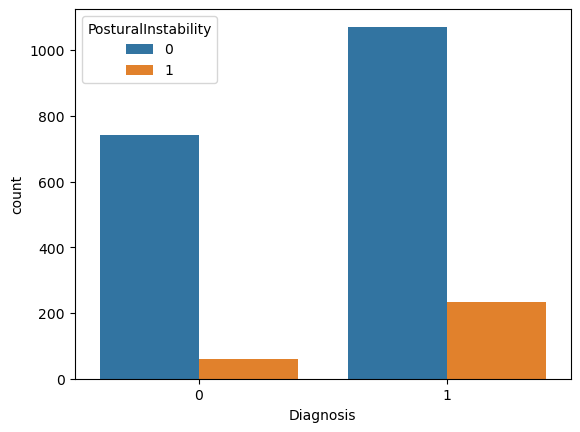

In [36]:
sns.countplot(data=df,x='Diagnosis',hue='PosturalInstability')

<Axes: xlabel='Diagnosis', ylabel='count'>

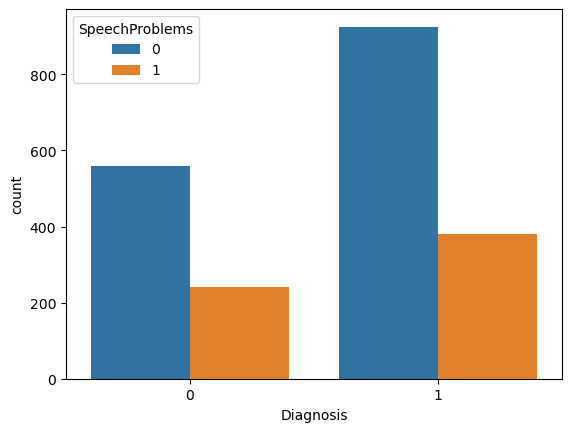

In [37]:
sns.countplot(data=df,x='Diagnosis',hue='SpeechProblems')

<Axes: xlabel='Diagnosis', ylabel='count'>

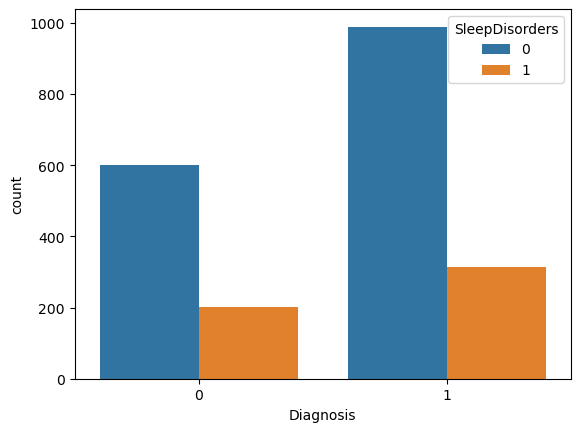

In [38]:
sns.countplot(data=df,x='Diagnosis',hue='SleepDisorders')

<Axes: xlabel='Diagnosis', ylabel='count'>

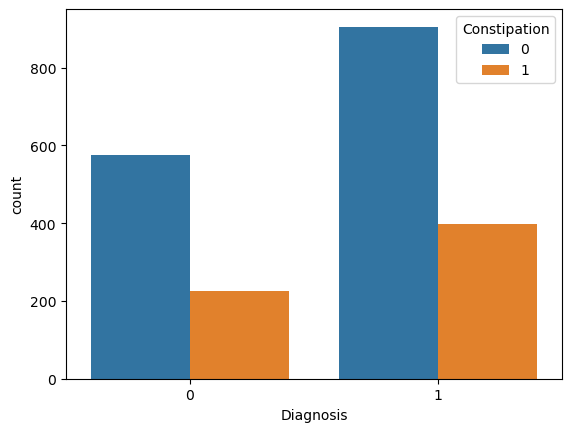

In [39]:
sns.countplot(data=df,x='Diagnosis',hue='Constipation')

In [40]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(XX,y,random_state=0,test_size=0.2)

In [41]:
from sklearn.linear_model import LogisticRegression
logModel = LogisticRegression(max_iter=1000)
logModel.fit(X_train,y_train)

C:\Users\anush\.conda\envs\mlEnv\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

In [42]:
ypreds = logModel.predict(X_test)

In [43]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,ypreds)

array([[115,  40],
       [ 39, 227]], dtype=int64)

In [44]:
from sklearn.metrics import ConfusionMatrixDisplay

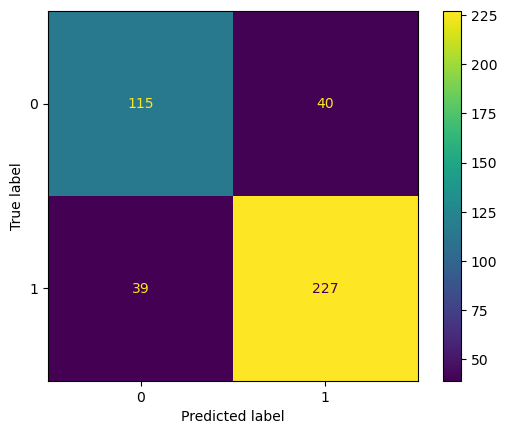

In [45]:
disp = ConfusionMatrixDisplay(confusion_matrix(y_test,ypreds))
disp.plot()
plt.show()

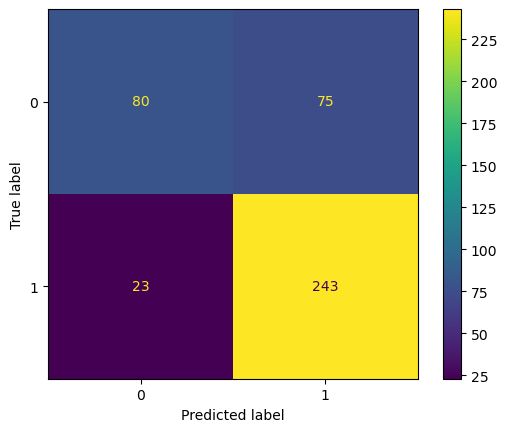

In [46]:
from sklearn.svm import SVC
svcModel = SVC()
svcModel.fit(X_train,y_train)
ypreds = svcModel.predict(X_test)
disp = ConfusionMatrixDisplay(confusion_matrix(y_test,ypreds))
disp.plot()
plt.show()

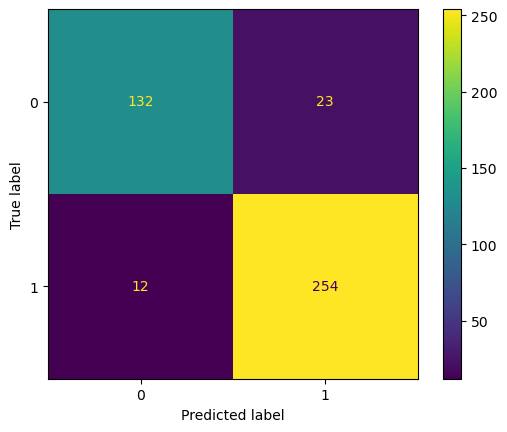

In [47]:
from sklearn.ensemble import RandomForestClassifier
svcModel = RandomForestClassifier(n_estimators=1000,criterion='entropy')
svcModel.fit(X_train,y_train)
ypreds = svcModel.predict(X_test)
disp = ConfusionMatrixDisplay(confusion_matrix(y_test,ypreds))
disp.plot()
plt.show()

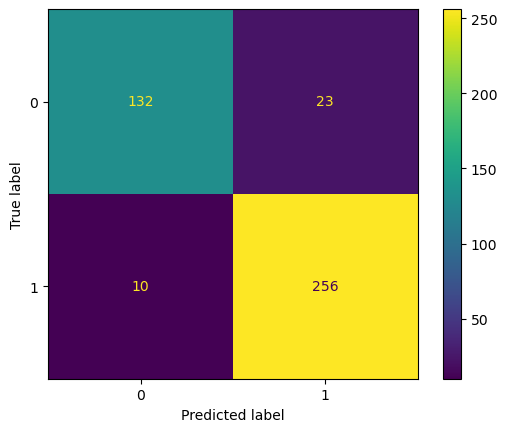

In [48]:
from sklearn.ensemble import RandomForestClassifier
svcModel = RandomForestClassifier(n_estimators=1000,criterion='gini')
svcModel.fit(X_train,y_train)
ypreds = svcModel.predict(X_test)
disp = ConfusionMatrixDisplay(confusion_matrix(y_test,ypreds))
disp.plot()
plt.show()

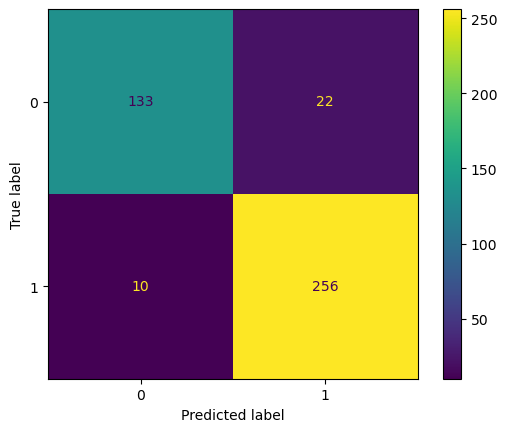

In [49]:
from sklearn.ensemble import RandomForestClassifier
svcModel = RandomForestClassifier(n_estimators=1000,criterion='log_loss')
svcModel.fit(X_train,y_train)
ypreds = svcModel.predict(X_test)
disp = ConfusionMatrixDisplay(confusion_matrix(y_test,ypreds))
disp.plot()
plt.show()

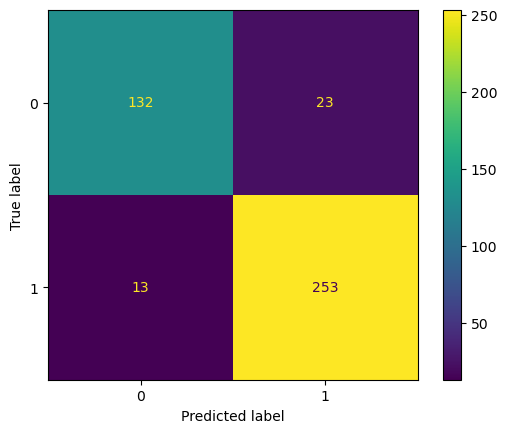

In [50]:
from sklearn.ensemble import RandomForestClassifier
svcModel = RandomForestClassifier(n_estimators=1000,criterion='gini',max_features='log2')
svcModel.fit(X_train,y_train)
ypreds = svcModel.predict(X_test)
disp = ConfusionMatrixDisplay(confusion_matrix(y_test,ypreds))
disp.plot()
plt.show()

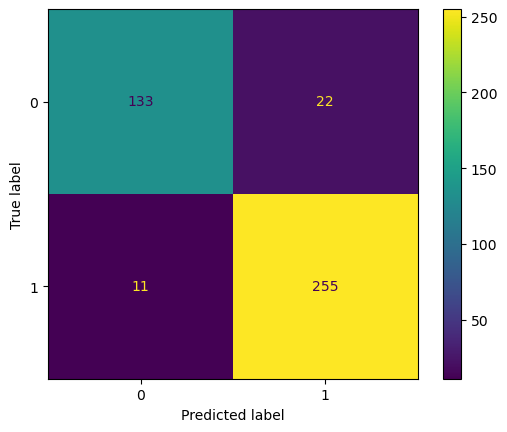

In [51]:
from sklearn.ensemble import RandomForestClassifier
svcModel = RandomForestClassifier(n_estimators=1000,criterion='gini',max_features=None,)
svcModel.fit(X_train,y_train)
ypreds = svcModel.predict(X_test)
disp = ConfusionMatrixDisplay(confusion_matrix(y_test,ypreds))
disp.plot()
plt.show()

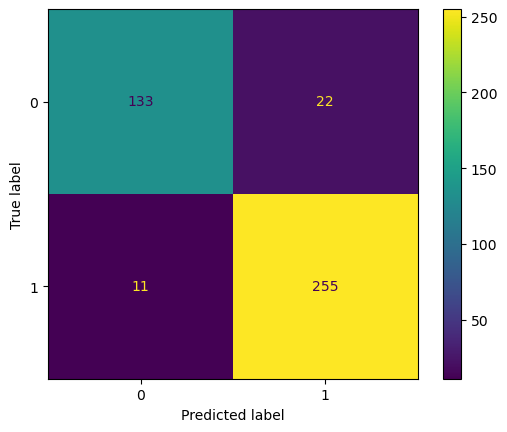

In [52]:
import xgboost as xgb
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)
params = {
    'objective': 'multi:softprob',  # Specify multiclass classification
    'num_class': 2,  # Number of classes in the dataset
    'max_depth': 4,  # Maximum depth of a tree
    'eta': 0.3,  # Learning rate
    'eval_metric': 'logloss'  # Evaluation metric
}

# Train the model
num_rounds = 100  # Number of boosting rounds
bst = xgb.train(params, dtrain, num_rounds)
preds = bst.predict(dtest)
predictions = [int(round(p)) for p in preds.argmax(axis=1)]

# Evaluate the accuracy of the model
# accuracy = accuracy_score(y_test, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix(y_test,ypreds))
disp.plot()
plt.show()

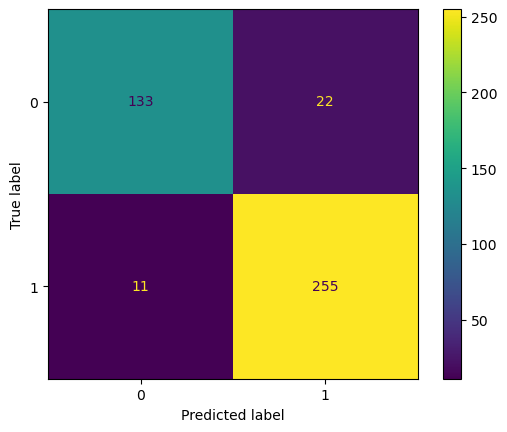

In [53]:
import xgboost as xgb
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

params = {
    'objective': 'binary:logistic',  # Specify binary classification
    'max_depth': 4,  # Maximum depth of a tree
    'eta': 0.3,  # Learning rate
    'eval_metric': 'logloss'  # Evaluation metric
}

# Train the model
num_rounds = 100  
bst = xgb.train(params=params,dtrain=dtrain, num_boost_round=num_rounds)
preds = bst.predict(dtest)
predictions = [1 if p > 0.5 else 0 for p in preds]
disp = ConfusionMatrixDisplay(confusion_matrix(y_test,ypreds))
disp.plot()
plt.show()

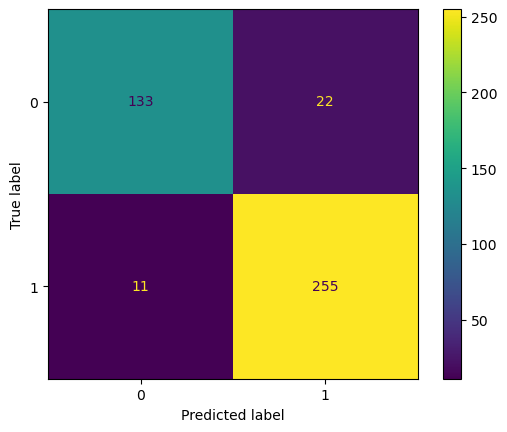

In [54]:
import xgboost as xgb
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

params = {
    'objective': 'binary:logistic',  # Specify binary classification
    'max_depth': 6,  # Maximum depth of a tree
    'eta': 0.3,  # Learning rate
    'eval_metric': 'logloss'  # Evaluation metric
}

# Train the model
num_rounds = 250
bst = xgb.train(params=params,dtrain=dtrain, num_boost_round=num_rounds)
preds = bst.predict(dtest)
predictions = [1 if p > 0.99 else 0 for p in preds]
disp = ConfusionMatrixDisplay(confusion_matrix(y_test,ypreds))
disp.plot()
plt.show()

In [55]:
np.unique(y_test,return_counts=True)

(array([0, 1], dtype=int64), array([155, 266], dtype=int64))

In [56]:
np.unique(y,return_counts=True)

(array([0, 1], dtype=int64), array([ 801, 1304], dtype=int64))